在本章中，将学习编写一个独立的程序，并对其获取的数据进行可视化。这个程序将使用Web应用编程接口（API）自动请求网站的特定信息而不是整个网页，再对这些信息进行可视化。

## 17.1　使用Web API
Web API是网站的一部分，用于与使用非常具体的URL请求特定信息的程序交互。这种请求称为API调用。请求的数据将以易于处理的格式（如JSON或CSV）返回。依赖于外部数据源的大多数应用程序都依赖于API调用，如集成社交媒体网站的应用程序。

### 17.1.1　Git和GitHub
本章的可视化基于来自GitHub的信息，这是一个让程序员能够协作开发项目的网站。将使用GitHub的API来请求有关该网站中Python项目的信息，然后使用Pygal生成交互式可视化，以呈现这些项目的受欢迎程度。

> GitHub（https://github.com/ ）的名字源自Git，Git是一个分布式版本控制系统，让程序员团队能够协作开发项目。Git帮助大家管理为项目所做的工作，避免一个人所做的修改影响其他人所做的修改。在项目中实现新功能时，Git将跟踪对每个文件所做的修改。确定代码可行后，提交所做的修改，而Git将记录项目最新的状态。如果犯错，可轻松地返回以前的任何可行状态。GitHub上的项目都存储在仓库中，后者包含与项目相关联的一切：代码、项目参与者的信息、问题或bug报告等。

> 对于喜欢的项目，GitHub用户可给它加星（star）以表示支持，用户还可跟踪他可能想使用的项目。

在本章中，将编写一个程序，它自动下载GitHub上星级最高的Python项目的信息，并对这些信息进行可视化。

### 17.1.2　使用API调用请求数据
GitHub的API让你能够通过API调用来请求各种信息。
```
https://api.github.com/search/repositories?q=language:python&sort=stars
```
这个调用返回GitHub当前托管了多少个Python项目，还有有关最受欢迎的Python仓库的信息。

### 17.1.3　安装requests
```sh
pip3 install --user requests
```

### 17.1.4　处理API响应

In [1]:
import requests

# 执行API调用并存储响应
url = "https://api.github.com/search/repositories?q=language:python&sort=stars"
req = requests.get(url)
print("Status Code:", req.status_code)

# 将API响应存储在一个变量中
response_dict = req.json()

# 处理结果
print(response_dict.keys())

Status Code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


首先导入模块requests 。存储API调用的URL，然后使用requests 来执行调用。调用get() 并将URL传递给它，再将响应对象存储在变量req中。响应对象包含一个名为status_code的属性，它让我们知道请求是否成功了（状态码200表示请求成功）。最后打印status_code，核实调用是否成功了。

这个API返回JSON格式的信息，因此使用方法json()将这些信息转换为一个Python字典。

### 17.1.5　处理响应字典

In [2]:
print("Total repositories:", response_dict['total_count'])

# 探索有关仓库的信息
repo_dicts = response_dict['items']
print("Repositories returned:", len(repo_dicts))

# 研究第一个仓库
repo_dict = repo_dicts[0]
print("\nKeys:", len(repo_dict))
print_num = 0
for key in sorted(repo_dict.keys()):
    print(key)
    print_num += 1
    if print_num > 10:
        break

Total repositories: 5009702
Repositories returned: 30

Keys: 74
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url


In [3]:
# 研究一个仓库
repo_dict = repo_dicts[20]

print("\nSelected information about first repository:")
print('Name:', repo_dict['name'])
print('Owner:', repo_dict['owner']['login'])
print('Stars:', repo_dict['stargazers_count'])
print('Repository:', repo_dict['html_url'])
print('Created:', repo_dict['created_at'])
print('Updated:', repo_dict['updated_at'])
print('Description:', repo_dict['description'])


Selected information about first repository:
Name: you-get
Owner: soimort
Stars: 31686
Repository: https://github.com/soimort/you-get
Created: 2012-08-20T15:53:36Z
Updated: 2020-03-27T12:28:22Z
Description: :arrow_double_down: Dumb downloader that scrapes the web


### 17.1.6　概述最受欢迎的仓库

In [4]:
repo_dicts = response_dict['items']
print("Repositories returned:", len(repo_dicts))

print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print('\nName:', repo_dict['name'])
    print('Owner:', repo_dict['owner']['login'])
    print('Stars:', repo_dict['stargazers_count'])
    print('Repository:', repo_dict['html_url'])
    print('Description:', repo_dict['description'])

Repositories returned: 30

Selected information about each repository:

Name: system-design-primer
Owner: donnemartin
Stars: 85975
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: awesome-python
Owner: vinta
Stars: 80591
Repository: https://github.com/vinta/awesome-python
Description: A curated list of awesome Python frameworks, libraries, software and resources

Name: public-apis
Owner: public-apis
Stars: 72865
Repository: https://github.com/public-apis/public-apis
Description: A collective list of free APIs for use in software and web development.

Name: Python
Owner: TheAlgorithms
Stars: 68770
Repository: https://github.com/TheAlgorithms/Python
Description: All Algorithms implemented in Python

Name: youtube-dl
Owner: ytdl-org
Stars: 63344
Repository: https://github.com/ytdl-org/youtube-dl
Description: Command-line program to download videos fr

### 17.1.7　监视API的速率限制
大多数API都存在速率限制，即你在特定时间内可执行的请求数存在限制。要获悉你是否接近了GitHub的限制，请在浏览器中输入`https://api.github.com/rate_limit`

## 17.2　使用Pygal可视化仓库

Status code: 200
Total repositories: 5009701


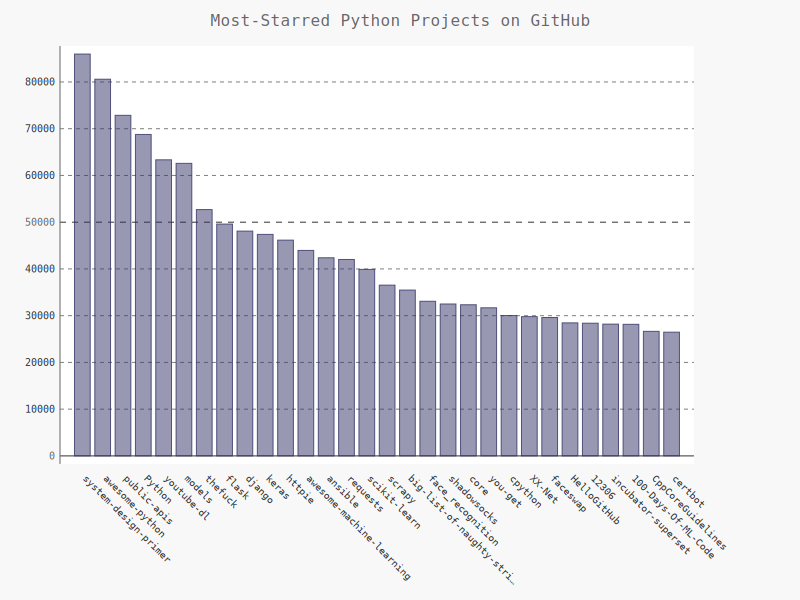

In [5]:
import requests
import pygal
from IPython.display import SVG, display
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

# 执行API调用并存储响应
URL = 'https://api.github.com/search/repositories?q=language:python&sort=star'
req = requests.get(URL)
print("Status code:", req.status_code)

# 将API响应存储在一个变量中
response_dict = req.json()
print("Total repositories:", response_dict['total_count'])

# 研究有关仓库的信息
repo_dicts = response_dict['items']

names, stars = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

# 可视化
my_style = LS('#333366', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', stars)
chart.render_to_file('python_repos.svg')
display(SVG(chart.render()))

使用LightenStyle类（别名LS）定义了一种样式，并将其基色设置为深蓝色。传递了实参base_style，以使用LightColorizedStyle类（别名LCS）。然后，使用Bar()创建一个简单的条形图，并向它传递了my_style。还传递了另外两个样式实参：让标签绕x 轴旋转45度（x_label_rotation=45），并隐藏了图例（show_legend=False），因为只在图表中绘制一个数据系列。接下来，给图表指定了标题，并将属性x_labels设置为列表names。

由于我们不需要给这个数据系列添加标签，因此在添加数据时，将标签设置成了空字符串。

### 17.2.1　改进Pygal图表

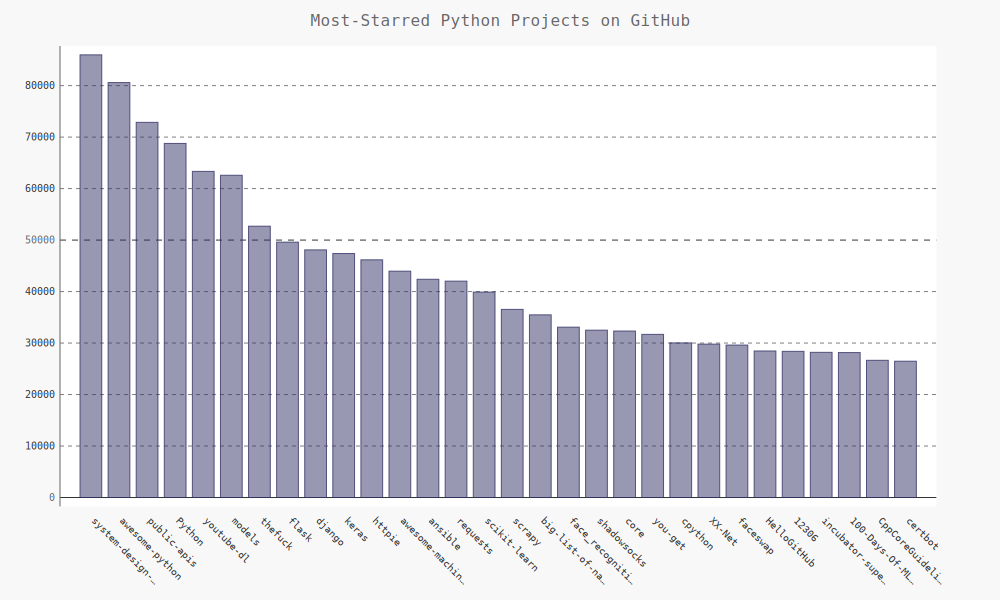

In [6]:
# 可视化
my_style = LS('#333366', base_style=LCS)

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
#  将较长的项目名缩短为15个字符
my_config.truncate_label = 15
my_config.show_y_guides = True
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', stars)
chart.render_to_file('python_repos.svg')
display(SVG(chart.render()))

### 17.2.2　添加自定义工具提示
在Pygal中，将鼠标指向条形将显示它表示的信息，这通常称为工具提示 。

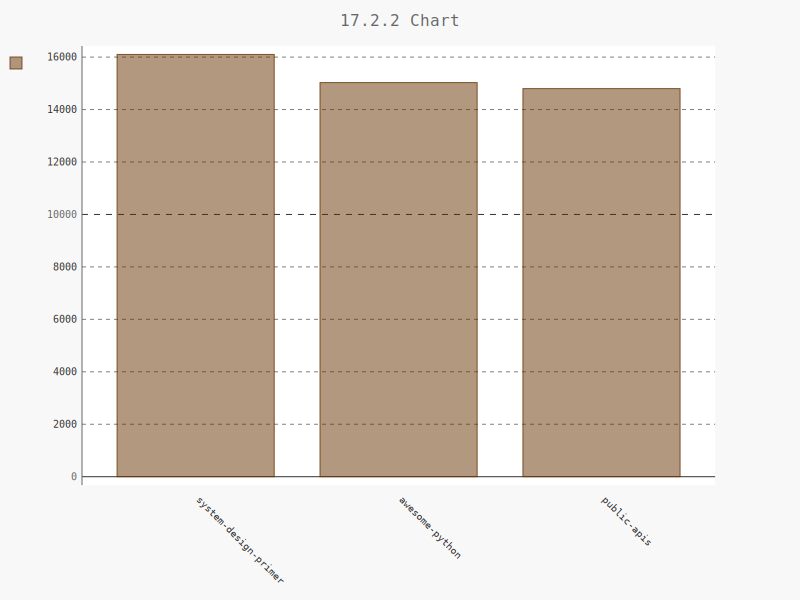

In [7]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import SVG, display

my_style = LS('#663300', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=True)

chart.title = '17.2.2 Chart'
chart.x_labels = ['system-design-primer', 'awesome-python', 'public-apis']

plot_dicts = [{'value': 16101, 'label': 'Description of system-design-primer.'},
              {'value': 15028, 'label': 'Description of awesome-python.'},
              {'value': 14798, 'label': 'Description of public-apis.'},]

chart.add('',plot_dicts)
chart.render_to_file('python_repos.svg')
display(SVG(chart.render()))

定义一个名为plot_dicts 的列表，其中包含三个字典，分别针对前三个项目。每个字典都包含两个键：'value' 和'label' 。Pygal根据与键'value' 相关联的数字来确定条形的高度，并使用与'label' 相关联的字符串给条形创建工具提示。

### 17.2.3　根据数据绘图

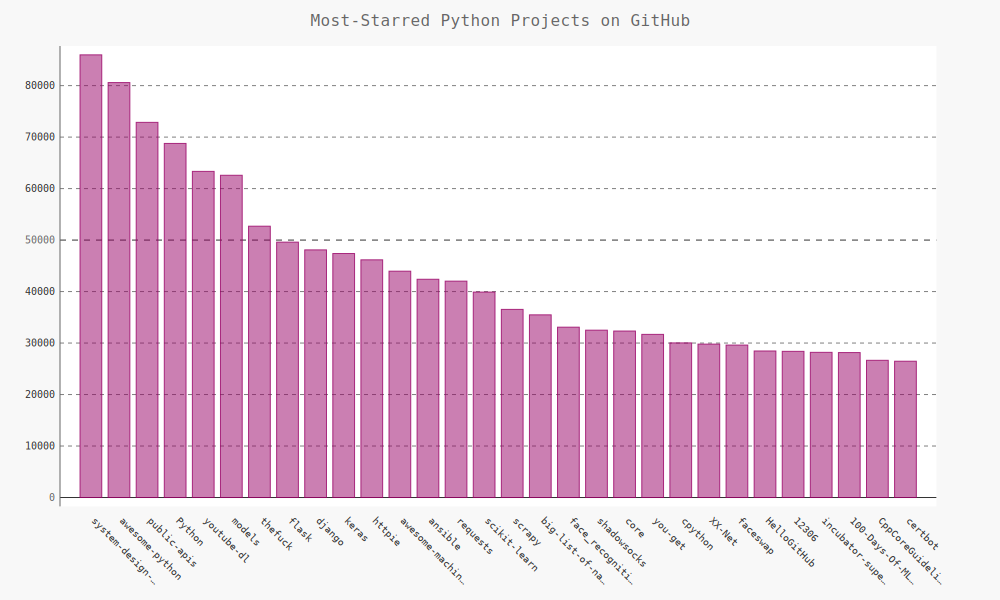

In [8]:
# 可视化
my_style = LS('#990066', base_style=LCS)

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
#  将较长的项目名缩短为15个字符
my_config.truncate_label = 15
my_config.show_y_guides = True
my_config.width = 1000

names, list_plot_dicts = [], []

for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    
    plot_dict = dict()
    plot_dict['value']=repo_dict['stargazers_count']
    # 通过str函数解决NoneType的问题
    plot_dict['label']=str(repo_dict['description'])
    
    list_plot_dicts.append(plot_dict)

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', list_plot_dicts)
chart.render_to_file('python_repos.svg')
display(SVG(chart.render()))

### 17.2.4　在图表中添加可单击的链接

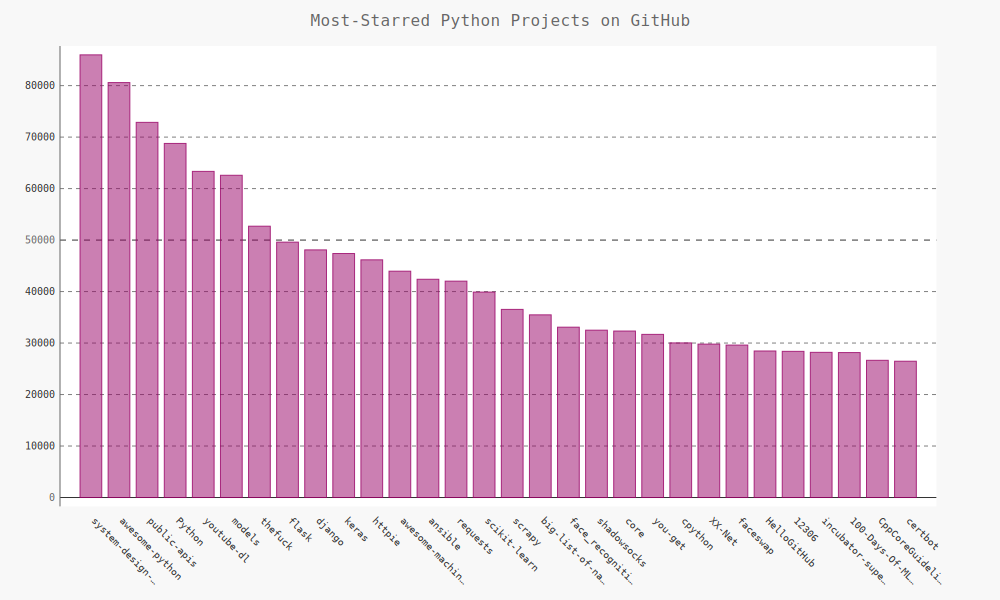

In [9]:
names, list_plot_dicts = [], []

for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    
    plot_dict = dict()
    plot_dict['value'] = repo_dict['stargazers_count']
    # 通过str函数解决NoneType的问题
    plot_dict['label'] = str(repo_dict['description'])
    plot_dict['xlink'] = repo_dict['html_url']
    
    list_plot_dicts.append(plot_dict)

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', list_plot_dicts)
chart.render_to_file('python_repos.svg')
display(SVG(chart.render()))

Pygal根据与键'xlink' 相关联的URL将每个条形都转换为活跃的链接。单击图表中的任何条形时，都将在浏览器中打开一个新的标签页，并在其中显示相应项目的GitHub页面。

## 17.3　Hacker News API

为探索如何使用其他网站的API调用，我们来看看Hacker News（http://news.ycombinator.com/ ）。在Hacker News网站，用户分享编程和技术方面的文章，并就这些文章展开积极的讨论。Hacker News的API让你能够访问有关该网站所有文章和评论的信息，且不要求你通过注册获得密钥。
`https://hacker-news.firebaseio.com/v0/item/9884165.json`

In [10]:
import requests
from operator import itemgetter
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
# 通过Proxy方式获取内容
proxies={'http':'221.178.146.113:61399',
         'https':'221.178.146.113:61399'}
req = requests.get(url, proxies = proxies)
print(req.status_code)

# 处理有关每篇文章的信息
submission_ids = req.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    # 对于每篇文章，都执行一个API调用
    url = 'https://hacker-news.firebaseio.com/v0/item/{}.json'.format(submission_id)
    submission_r = requests.get(url, proxies = proxies)
    # print(submission_r.status_code)
    response_dict = submission_r.json()
    
    submission_dict = {
        'label': response_dict['title'],
        'xlink': 'http://news.ycombinator.com/item?id=' + str(submission_id),
        'value': int(response_dict.get('descendants', 0))
    }
    submission_dicts.append(submission_dict)
    
    submission_dicts = sorted(submission_dicts, key=itemgetter('value'),
                              reverse=True)

for submission_dict in submission_dicts:
    print("\nTitle:", submission_dict['label'])
    print("Discussion link:", submission_dict['xlink'])
    print("Comments:", submission_dict['value'])

submission_name = [x['label'] for x in submission_dicts]


200

Title: Zoom iOS app sends data to Facebook even if you don’t have a Facebook account
Discussion link: http://news.ycombinator.com/item?id=22693792
Comments: 316

Title: It's not what programming languages do, it's what they shepherd you to
Discussion link: http://news.ycombinator.com/item?id=22696229
Comments: 208

Title: Zotero: Personal Research Assistant
Discussion link: http://news.ycombinator.com/item?id=22694891
Comments: 182

Title: How South Korea Reined In The Outbreak Without Shutting Everything Down
Discussion link: http://news.ycombinator.com/item?id=22701398
Comments: 121

Title: Upgraded Google Glass helps autistic kids “see” emotions
Discussion link: http://news.ycombinator.com/item?id=22699608
Comments: 73

Title: Your First THINK C Program
Discussion link: http://news.ycombinator.com/item?id=22660888
Comments: 70

Title: Our list of free software for remote work
Discussion link: http://news.ycombinator.com/item?id=22698299
Comments: 60

Title: Adding tests when yo

In [11]:
### 

### ***练习：***
17-1 其他语言 ：修改python_repos.py中的API调用，使其在生成的图表中显示使用其他语言编写的最受欢迎的项目。请尝试语言JavaScript、Ruby、C、Java、Perl、Haskell和Go等。

17-2 最活跃的讨论 ：使用hn_submissions.py中的数据，创建一个条形图，显示Hacker News上当前最活跃的讨论。条形的高度应对应于文章得到的评论数量，条形的标签应包含文章的标题，而每个条形应是到该文章讨论页面的链接。

17-3 测试python_repos.py ：在python_repos.py中，打印status_code 的值，以核实API调用是否成功了。请编写一个名为test_python_repos.py的程序，它使用单元测试来断言status_code 的值为200。想想你还可做出哪些断言，如返回的条目数符合预期，仓库总数超过特定的值等。

-----17-1-----
Status code: 200
Total repositories: 1376017


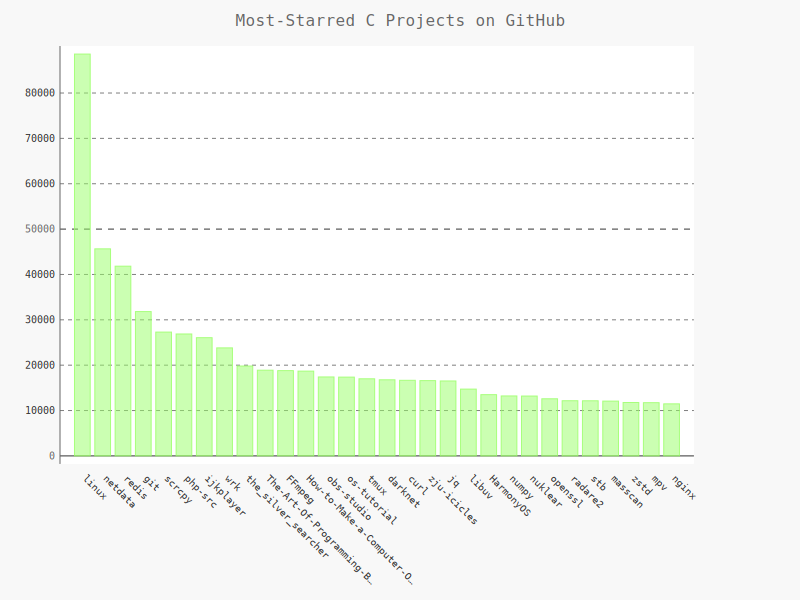

In [14]:
# 17-1
print("-----17-1-----")

import requests
import pygal
from IPython.display import SVG, display
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

# 执行API调用并存储响应
URL = 'https://api.github.com/search/repositories?q=language:c&sort=star'
req = requests.get(URL)
print("Status code:", req.status_code)

# 将API响应存储在一个变量中
response_dict = req.json()
print("Total repositories:", response_dict['total_count'])

# 研究有关仓库的信息
repo_dicts = response_dict['items']

names, stars = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(
        {'value':repo_dict['stargazers_count'],
        'label':str(repo_dict['description']),
        'xlink':repo_dict['html_url']}
    )

# 可视化
my_style = LS('#99FF66', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred C Projects on GitHub'
chart.x_labels = names

chart.add('', stars)
chart.render_to_file('c_repos.svg')
display(SVG(chart.render()))

-----17-2-----
200


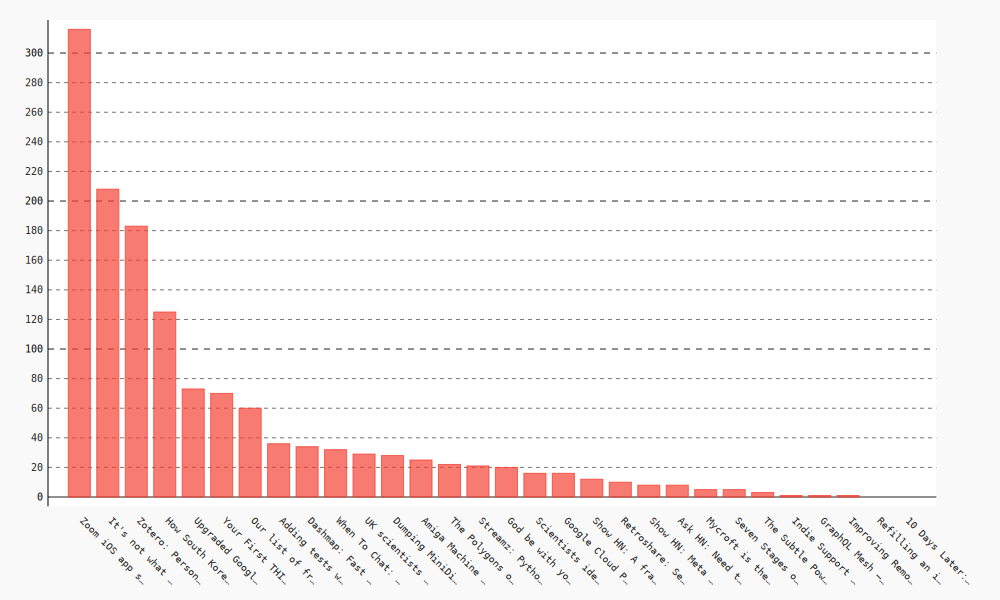

In [15]:
# 17-2
print("-----17-2-----")

import requests
from operator import itemgetter
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
# 通过Proxy方式获取内容
proxies={'http':'221.178.146.113:61399',
         'https':'221.178.146.113:61399'}
req = requests.get(url, proxies = proxies)
print(req.status_code)

# 处理有关每篇文章的信息
submission_ids = req.json()
submission_dicts = []
for submission_id in submission_ids[:30]:
    # 对于每篇文章，都执行一个API调用
    url = 'https://hacker-news.firebaseio.com/v0/item/{}.json'.format(submission_id)
    submission_r = requests.get(url, proxies = proxies)
    # print(submission_r.status_code)
    response_dict = submission_r.json()
    
    submission_dict = {
        'label': response_dict['title'],
        'xlink': 'http://news.ycombinator.com/item?id=' + str(submission_id),
        'value': int(response_dict.get('descendants', 0))
    }
    submission_dicts.append(submission_dict)
    
    submission_dicts = sorted(submission_dicts, key=itemgetter('value'),
                              reverse=True)

submission_name = [x['label'] for x in submission_dicts]


import pygal
from IPython.display import SVG, display

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
#  将较长的项目名缩短为15个字符
my_config.truncate_label = 15
my_config.show_y_guides = True
my_config.width = 1000

chart_sub = pygal.Bar(my_config)
chart_sub.x_labels = submission_name

chart_sub.add('',submission_dicts)
chart_sub.render_to_file('hack_news.svg')
display(SVG(chart_sub.render()))